# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
#data.head()
male_df =  data.loc[data['Gender']== 'Male']
female_df =  data.loc[data['Gender']== 'Female']
#female_df.head(25)

print('Male Height mean:',male_df.Height.mean())
print('Male Height sd:',male_df.Height.std())
print('Male Weight mean:',male_df.Weight.mean())
print('Male Weight sd:',male_df.Weight.std(),'\n')
  
print('Female Height mean:',female_df.Height.mean())
print('Female Height sd:',female_df.Height.std())
print('Female Weight mean:',female_df.Weight.mean())
print('Female Weight sd:',female_df.Weight.std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638 

Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

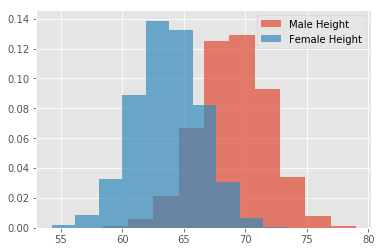

In [3]:
plt.hist(male_df.Height, bins = 10, alpha = 0.7, density = 1, label = 'Male Height')
plt.hist(female_df.Height, bins = 10, alpha = 0.7, density = 1, label = 'Female Height')
plt.legend()
plt.show()

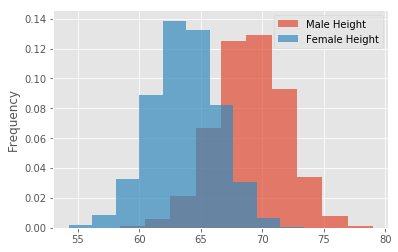

In [ ]:
# Record your observations - are these inline with your personal observations?
# females are obviously smaller than most males, on average by 6 inches (which makes sense to me)
# most of the overlap happens around 65-70 inches which makes sense to me



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

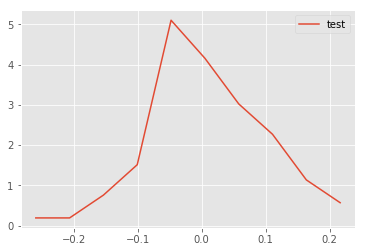

In [4]:
def density(x):
    n, bins = np.histogram (x, bins = 10, density = 1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

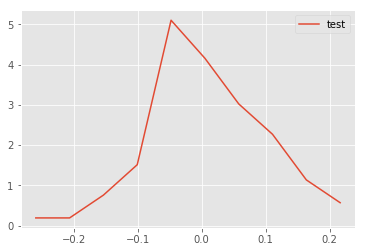

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

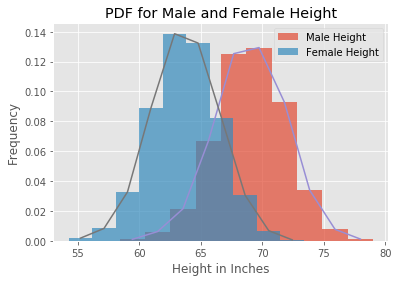

In [5]:
# You code here 
plt.hist(male_df.Height, bins = 10, alpha = 0.7, density = 1, label = 'Male Height')
plt.hist(female_df.Height, bins = 10, alpha = 0.7, density = 1, label = 'Female Height')

male_pdfx, male_pdfy = density(male_df.Height)
female_pdfx, female_pdfy = density(female_df.Height)

plt.plot(male_pdfx, male_pdfy)
plt.plot(female_pdfx, female_pdfy)
plt.legend()
plt.title('PDF for Male and Female Height')
plt.xlabel('Height in Inches')
plt.ylabel('Frequency')
plt.show()

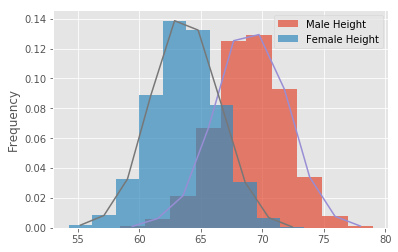

#### Repeat above exerice for male and female weights

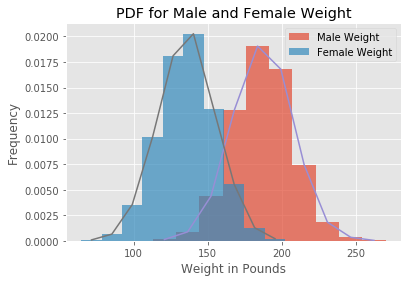

In [6]:
# Your code here 
plt.hist(male_df.Weight, bins = 10, alpha = 0.7, density = 1, label = 'Male Weight')
plt.hist(female_df.Weight, bins = 10, alpha = 0.7, density = 1, label = 'Female Weight')

male_pdfx2, male_pdfy2 = density(male_df.Weight)
female_pdfx2, female_pdfy2 = density(female_df.Weight)

plt.plot(male_pdfx2, male_pdfy2)
plt.plot(female_pdfx2, female_pdfy2)
plt.legend()
plt.title('PDF for Male and Female Weight')
plt.xlabel('Weight in Pounds')
plt.ylabel('Frequency')
plt.show()

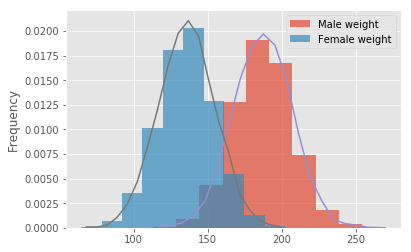

#### Write your observations in the cell below.

In [7]:
# Record your observations - are these inline with your personal observations?
# normal distribution for both female and male weight
# most overlap is 150-170 lbs

# So whats the takeaway when comparing male and female heights and weights 
# basically what you expect in terms of males and females - normal distributions, men are taller and heavier than females


#### Repeat Above experiments in seaborn and compare with your results. 

C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


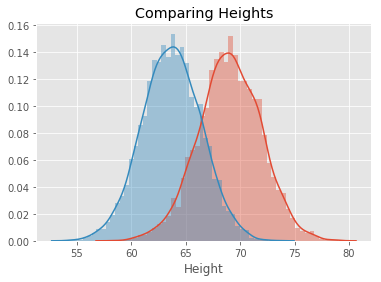

In [8]:
import seaborn as sns
import scipy.stats as stats

sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title ('Comparing Heights')
plt.show()



Text(0.5,1,'Comparing weights')

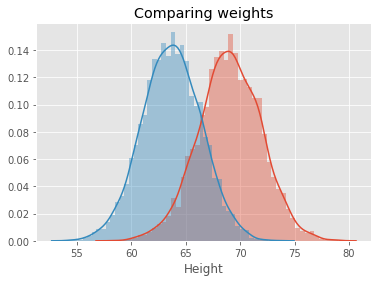

C:\Users\Alex\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


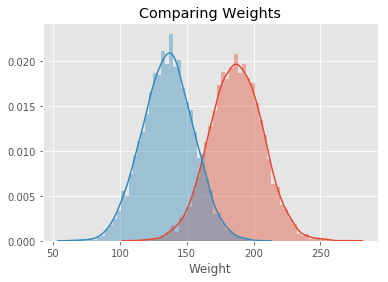

In [9]:
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title ('Comparing Weights')
plt.show()

Text(0.5,1,'Comparing Weights')

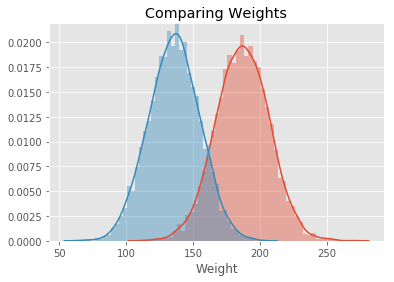

In [14]:
a

In [10]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
#both approaches are very similar
# the PDF approach using seaborn is smoother in terms of the PDF and the histograms and loses less data
# more accurate

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.